In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
df = pd.read_csv('bank-full.csv', delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [3]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
bin_cols = [col for col in df.columns if df[col].dtypes=='object' and df[col].nunique() == 2]
cate_cols = [col for col in df.columns if df[col].dtypes=='object' and col not in bin_cols]

bin_cols.remove('y')

In [5]:
df[bin_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   default  45211 non-null  object
 1   housing  45211 non-null  object
 2   loan     45211 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB


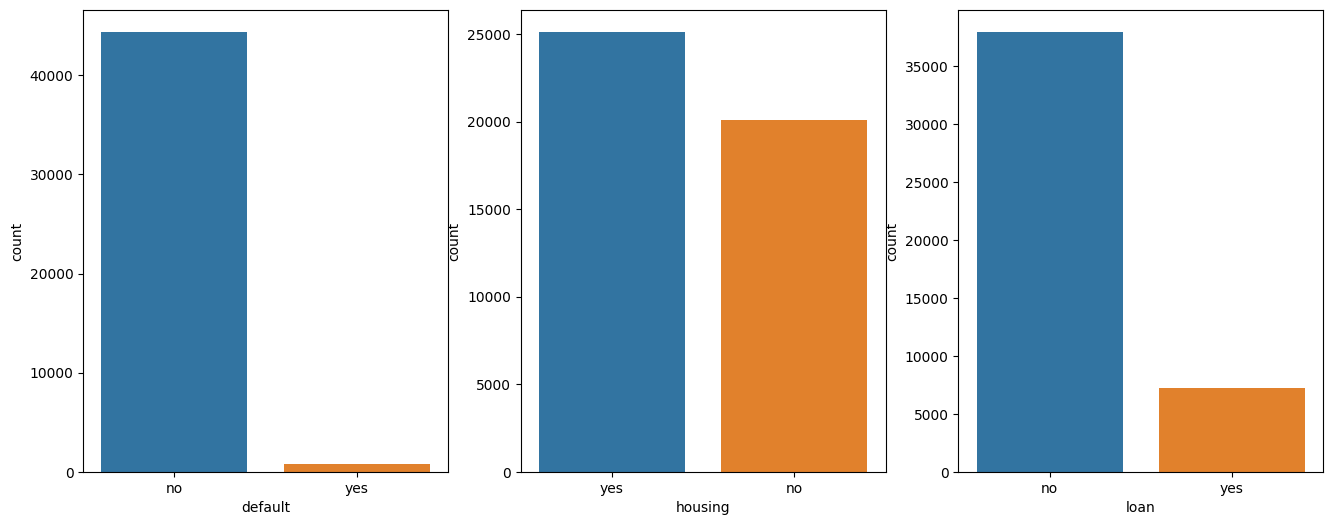

In [6]:
fig, axs = plt.subplots(1, len(bin_cols), figsize=(16,6))
for i, col in enumerate(bin_cols):
    sns.countplot(df, x=col, ax=axs[i])
plt.show()

In [7]:
df[cate_cols].nunique()

job          12
marital       3
education     4
contact       3
month        12
poutcome      4
dtype: int64

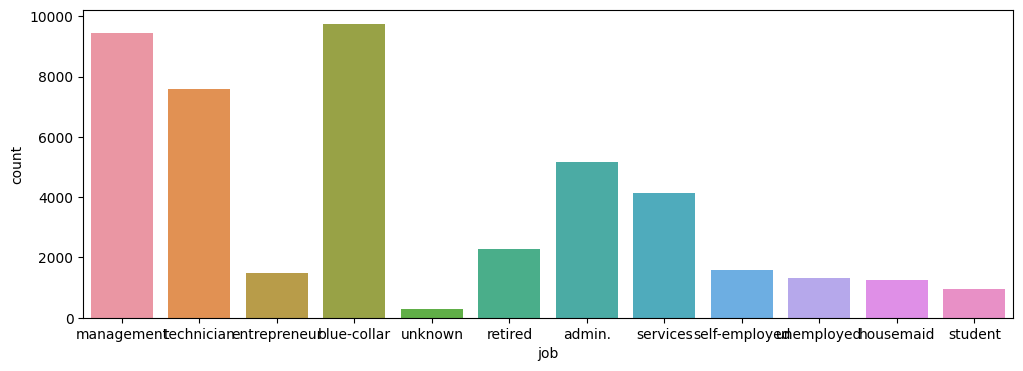

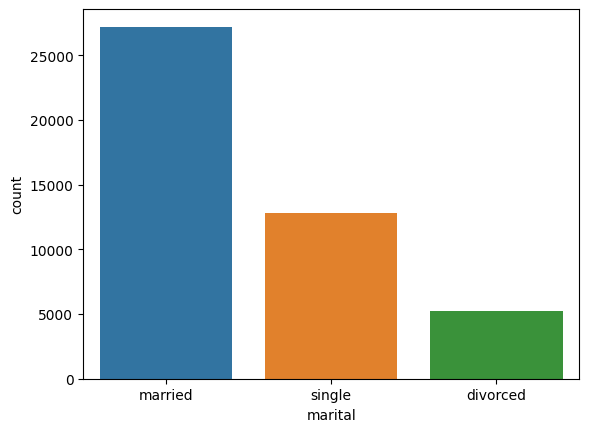

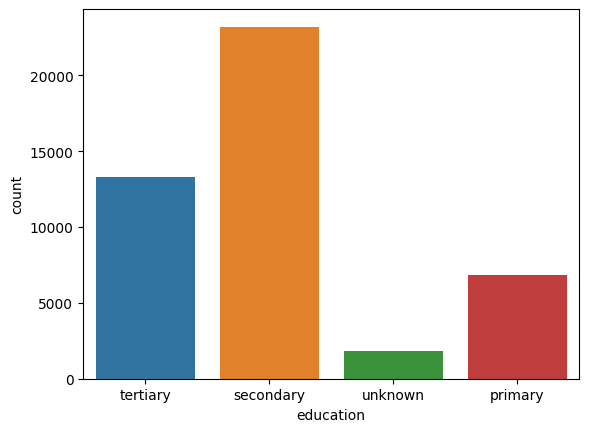

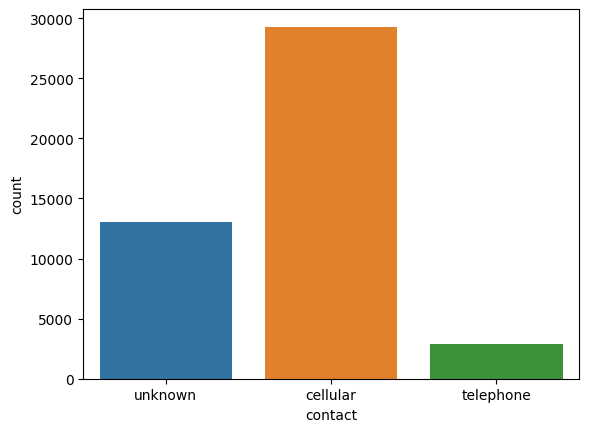

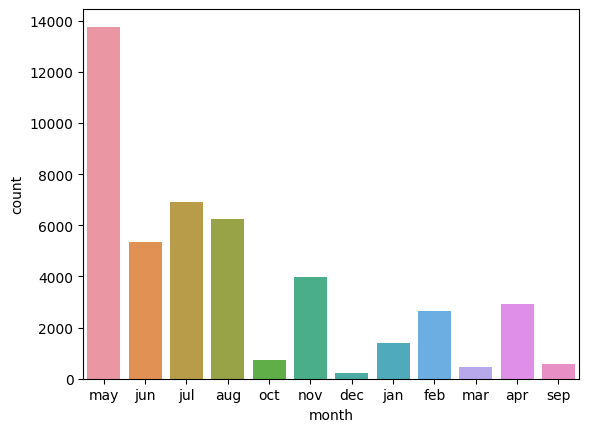

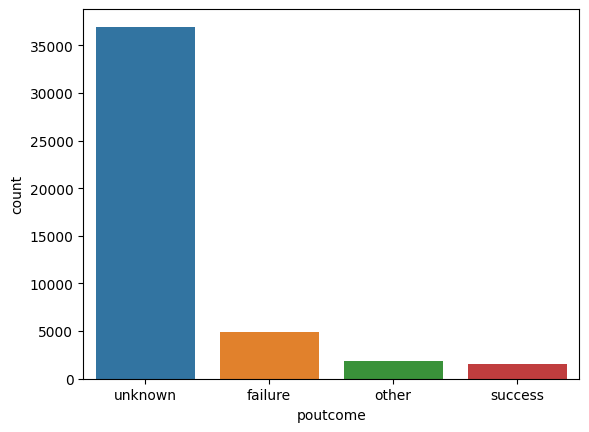

In [8]:
plt.figure(figsize=(12,4))
for col in cate_cols:
    sns.countplot(df, x=col)
    plt.show()

In [9]:
df.job.value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [10]:
minority_categories = ['retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid', 'student', 'unknown']

df['job'] = df['job'].apply(lambda x: 'others' if x in minority_categories else x)

In [11]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


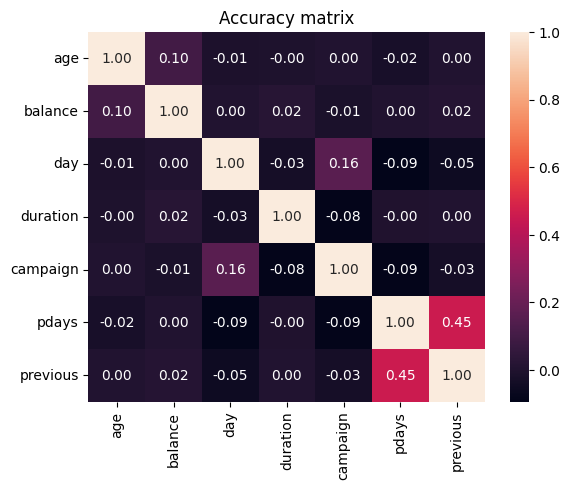

In [12]:
sns.heatmap(df[num_cols].corr(),fmt='.2f', annot=True)
plt.title("Accuracy matrix")
plt.show()

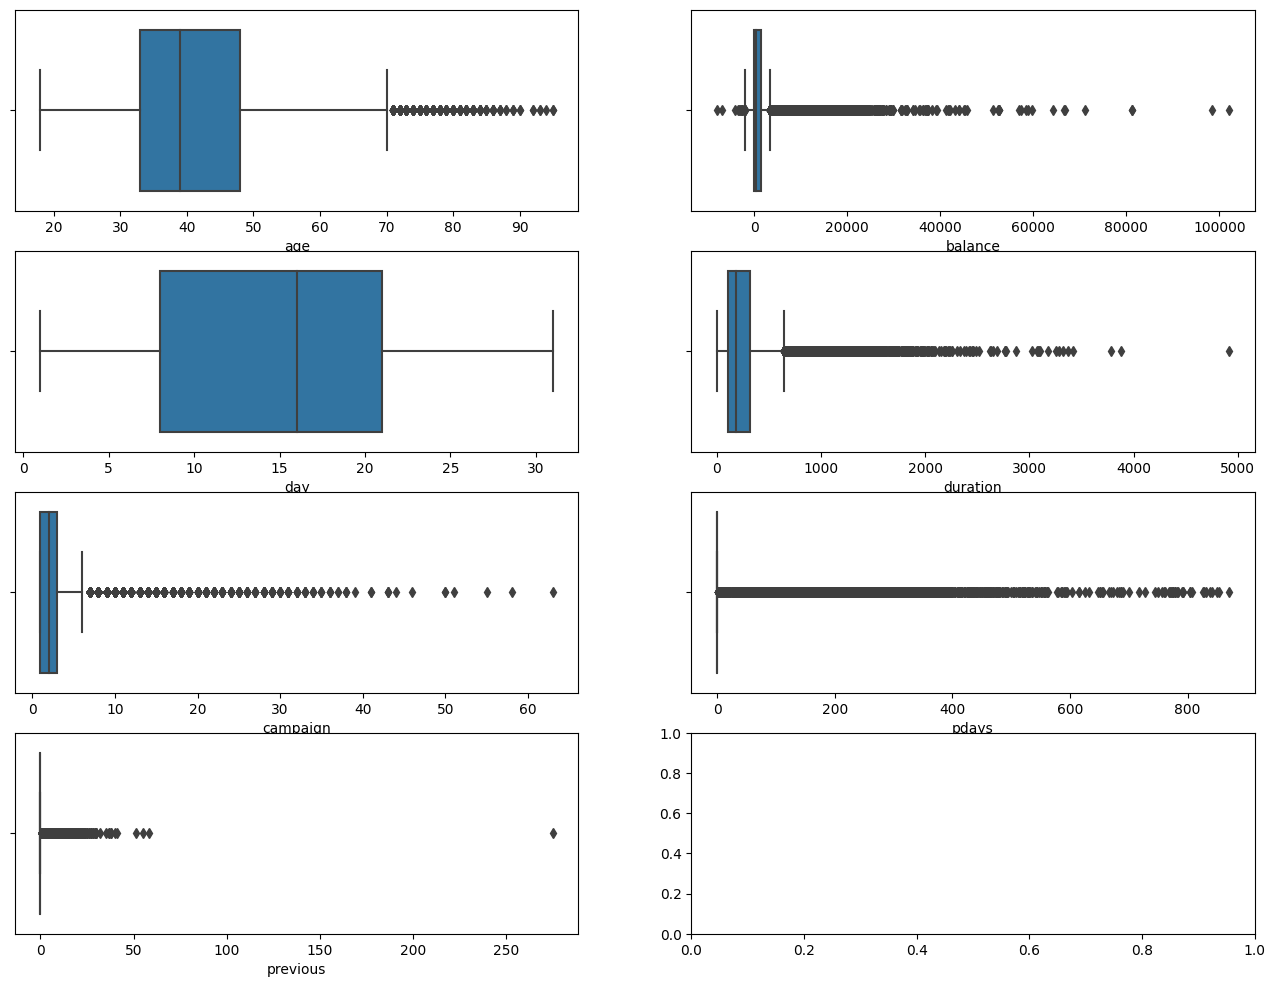

In [13]:
fig, axs = plt.subplots(math.ceil(len(num_cols)/2), 2, figsize=(16,12))
axs = axs.flat
for i,col in enumerate(num_cols):
    sns.boxplot(df, x=col, ax=axs[i])
plt.show()

In [14]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)

lower_limit = Q1 - 1.5 * (Q3 - Q1)
upper_limit = Q3 + 1.5 * (Q3 - Q1) 

df[num_cols] = np.where(df[num_cols] < lower_limit , Q1, df[num_cols])
df[num_cols] = np.where(df[num_cols] > upper_limit , Q3, df[num_cols])

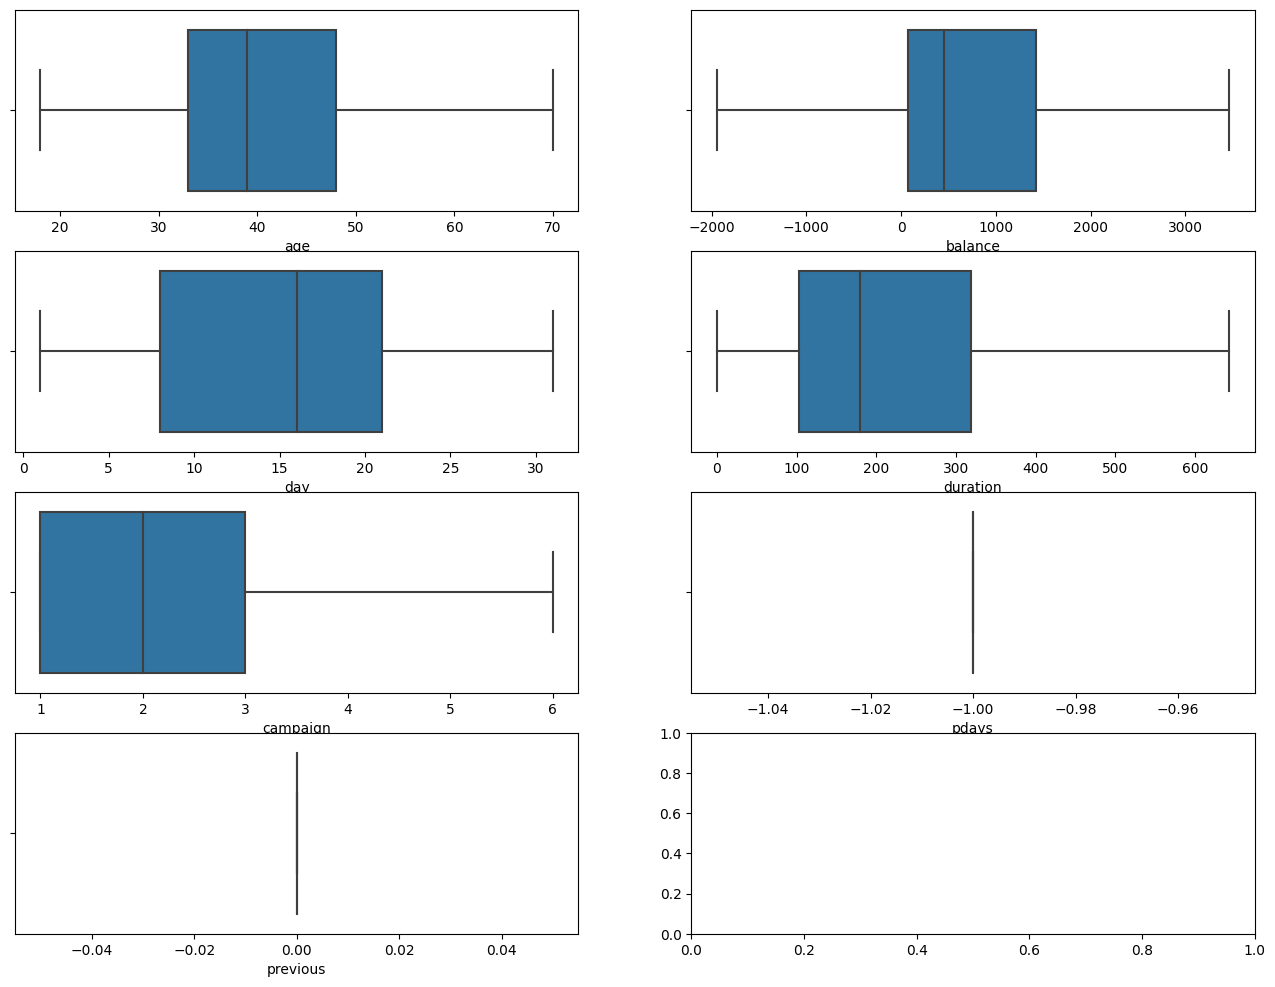

In [15]:
fig, axs = plt.subplots(math.ceil(len(num_cols)/2), 2, figsize=(16,12))
axs = axs.flat
for i,col in enumerate(num_cols):
    sns.boxplot(df, x=col, ax=axs[i])
plt.show()

In [16]:
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

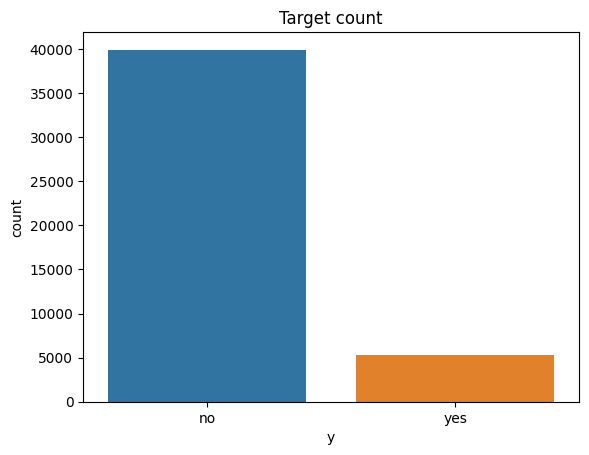

In [17]:
sns.countplot(df, x="y")
plt.title('Target count')
plt.show()

In [26]:
weights = {'no': 1, 'yes': df['y'].value_counts()['no'] / df['y'].value_counts()['yes']}
weights

{'no': 1, 'yes': 7.548118737001324}

In [19]:
y = df['y']
X = df[num_cols + cate_cols + bin_cols]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36168, 16), (9043, 16), (36168,), (9043,))

In [22]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

num_transform = StandardScaler()
bin_transform = OrdinalEncoder()
cate_transform = OneHotEncoder(sparse=False, handle_unknown='ignore')

processor = ColumnTransformer(transformers=[
    ('bin', bin_transform, bin_cols),
    ('num', num_transform, num_cols),
    ('cate', cate_transform, cate_cols)
])

In [23]:
X_train = processor.fit_transform(X_train)
X_test = processor.transform(X_test)

C:\Users\DELL INSPIRON 5625\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=0, class_weight=weights),
    'Logistic Regression': LogisticRegression(random_state=0, max_iter=1000, class_weight=weights),
    'Gaussian Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=0, class_weight=weights),
}

0.8723874820302997


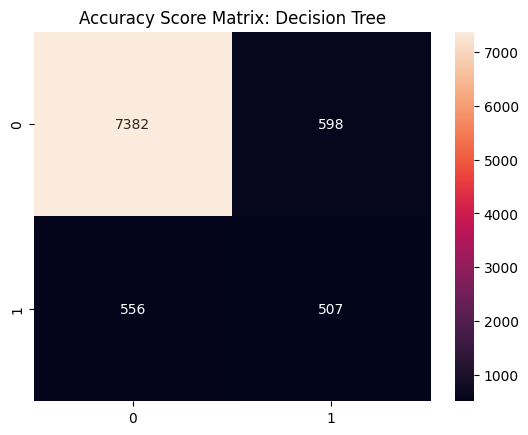

0.8914077186774301


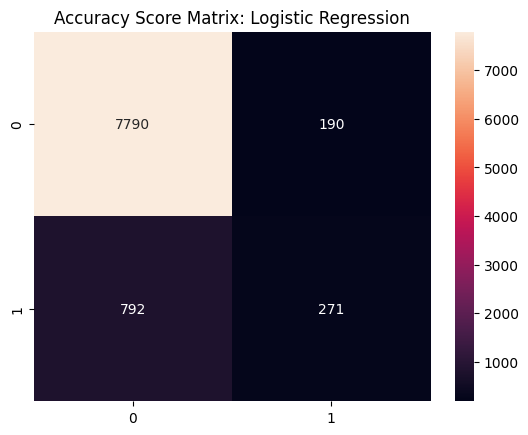

0.8737144752847507


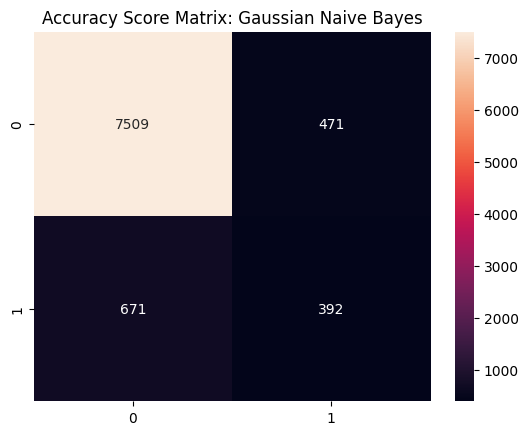

0.8993696782041358


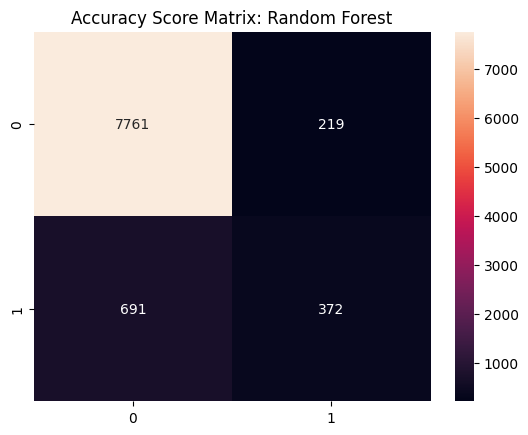

In [25]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(accuracy_score(y_test, pred))
    
    conf_matrix = confusion_matrix(y_test, pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d')
    plt.title('Accuracy Score Matrix: ' + model_name)
    plt.show()